In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../listings.csv')

# Data Exploring 

### Compreendendo o data frame

In [49]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,706258,luxury self –contained studios,3629429,Enjoy,NaN,San Lorenzo,40.85114,14.25063,Private room,103,1,8,2019-09-12,0.09,2,347,0,NaN
1,709020,Casa Frammenti (ex DormidaMè Museo),3647842,Livio & Chiara,NaN,Avvocata,40.85330,14.24590,Private room,300,2,12,2022-06-05,0.10,11,325,1,NaN
2,714333,nice seaview studio wifi in center,808350,Giancarlo,NaN,Porto,40.84020,14.25516,Entire home/apt,90,1,58,2022-06-04,0.48,6,337,1,NaN
3,709069,B&B in city center,3647842,Livio & Chiara,NaN,Porto,40.84000,14.25463,Private room,220,2,69,2022-07-31,0.67,11,364,2,NaN
4,715014,Centre of Naples - Lovely mansard,2473289,Lucia,NaN,Porto,40.84308,14.25663,Entire home/apt,55,1,11,2019-04-27,0.11,1,317,0,NaN


### Informação Geral sobre o data frame

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7520 non-null   int64  
 1   name                            7520 non-null   object 
 2   host_id                         7520 non-null   int64  
 3   host_name                       7507 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7520 non-null   object 
 6   latitude                        7520 non-null   float64
 7   longitude                       7520 non-null   float64
 8   room_type                       7520 non-null   object 
 9   price                           7520 non-null   int64  
 10  minimum_nights                  7520 non-null   int64  
 11  number_of_reviews               7520 non-null   int64  
 12  last_review                     61

### Visão geral das variáveis categóricas

In [58]:
df.describe(include="object").T

,count,unique,top,freq
name,7520,7408,Camera Matrimoniale,4
host_name,7507,1094,Salvatore,236
neighbourhood,7520,30,San Lorenzo,1316
room_type,7520,4,Entire home/apt,4759
last_review,6198,959,2022-09-11,246
license,437,354,15063049EXT1042,7


### Número de Colunas 

In [54]:
len(df.columns)

18

### Números de linhas no Data Frame 

In [53]:
len(df)

7520

### Numero de nomes de afintriões 

In [50]:
len(df.host_name.unique())

1095

### Numero de anfitriões únicos 

In [51]:
len(df.host_id.unique())

4130

Podemos observar no <i>host_name</i> que existem hosts com o mesmo nome porém o  <i>host_id</i> é unico para cada host 

### Número de Regiões de Naple 

In [52]:
len(df.neighbourhood.unique())

30

# Data Cleaning 

### Vamos fazer uma cópia do data frame original e modificar a cópia mantendo a original intacta

In [117]:
df_copy = df.copy()

### Como não vamos precisar do id para nenhuma análise nem estudo estatístico vamos retirá-las do data frame  

In [142]:
df_copy.drop(["id"], axis=1, inplace=True)

### Como a percentagem de null values é apenas 0.2% para o host_name o que corresponde a apenas 13 entradas vamos então deletar essas linhas,pois são poucas 

In [159]:
df_copy.dropna(axis=0, inplace=True, subset = ["host_name"])

### Percentagem de null values para todas as variáveis que possuem null values 

In [119]:
absolute_of_null = df_copy.isnull().sum()
absolute_of_null = absolute_of_null[absolute_of_null>0].sort_values()
absolute_of_null

host_name                13
last_review            1322
reviews_per_month      1322
license                7083
neighbourhood_group    7520
dtype: int64

In [81]:
percentages_of_null = (df_copy.isnull().sum() / len(df_copy))*100
percentages_of_null = percentages_of_null[percentages_of_null>0].sort_values()
percentages_of_null

host_name                0.172872
last_review             17.579787
reviews_per_month       17.579787
license                 94.188830
neighbourhood_group    100.000000
dtype: float64

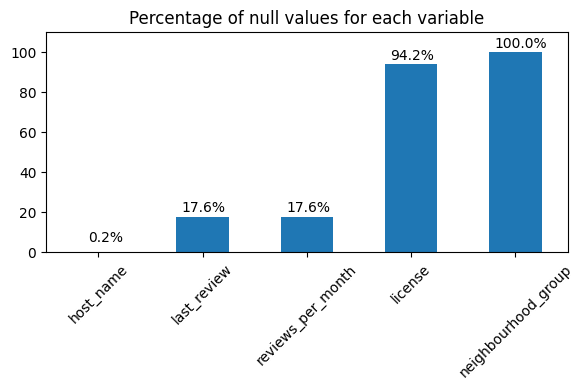

In [141]:
plt.figure(figsize=(6,4), dpi=100)
percentages_of_null.plot(kind="bar")
plt.title("Percentage of null values for each variable")
plt.xticks(rotation=45)
plt.ylim(0,110)
plt.text(-0.1,5,f'{np.round(percentages_of_null[0],1)}%')
plt.text(0.8,20,f'{np.round(percentages_of_null[1],1)}%')
plt.text(1.8,20,f'{np.round(percentages_of_null[2],1)}%')
plt.text(2.8,96,f'{np.round(percentages_of_null[3],1)}%')
plt.text(3.8,102,f'{np.round(percentages_of_null[4],1)}%')
plt.tight_layout()
plt.savefig("percentage.jpeg");

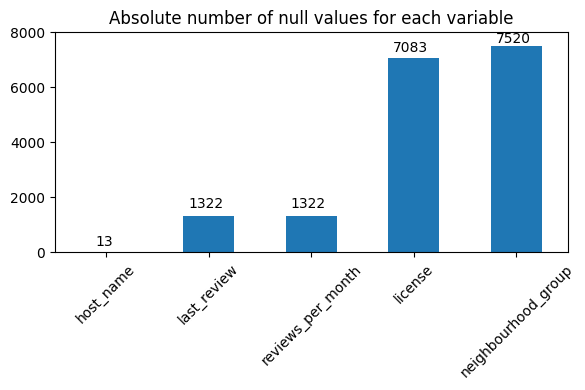

In [140]:
plt.figure(figsize=(6,4), dpi=100)
absolute_of_null.plot(kind='bar')
plt.title("Absolute number of null values for each variable")
plt.xticks(rotation=45)
plt.ylim(0,8000)
plt.text(-0.1,250,f'{np.round(absolute_of_null[0],1)}')
plt.text(0.8,1600,f'{np.round(absolute_of_null[1],1)}')
plt.text(1.8,1600,f'{np.round(absolute_of_null[2],1)}')
plt.text(2.8,7300,f'{np.round(absolute_of_null[3],1)}')
plt.text(3.8,7600,f'{np.round(absolute_of_null[4],1)}')
plt.tight_layout()
plt.savefig('absolute.jpeg');

### Podemos observar nos gráficos acima que a percentagem e o valor absoluto de null values para as variáveis que possuem null values 

### Vamos retirar as variáveis 'licence' e 'neighbourhood_group' por terem 94% e 100% de valores em branco respevtivamente. Ou seja, vamos eliminar ambas as colunas 

In [150]:
df_copy.drop(["license", "neighbourhood_group"], axis=1, inplace=True)

### Podemos observar abaixo que os valores que estão em falta para 'reviews_per_month' e 'last_review' são para casos em que o numero de reviews é igual a zero. Logo vamos colocar o valor 0.0 para 'reviews_per_month' e um ano fictício para o 'last_review' como '1900-01-01' pois ainda não sabemos se vamos utilizar essa informação ainda	

In [13]:
df_copy[df_copy["last_review"].isnull()].head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
10,Naturists rooms in the heart of city,14169118,San Carlo all'Arena,40.85759,14.25943,Private room,58,2,0,NaN,NaN,7,0,0
59,B&B Il Viaggiatore: stanza Gialla,1191263,San Giuseppe,40.84797,14.25014,Private room,135,2,0,NaN,NaN,4,343,0
76,Beautiful B & B Casa Avallone,1349033,Montecalvario,40.84476,14.24539,Private room,75,4,0,NaN,NaN,1,199,0
85,""" Ténéré "" room in the heart of historical cen...",14169118,Stella,40.85993,14.24994,Private room,80,2,0,NaN,NaN,7,295,0
104,B&B Il Viaggiatore: stanza Azzurra,1191263,Montecalvario,40.84815,14.24941,Private room,95,2,0,NaN,NaN,4,338,0


### Acrescentar 0.0 nos null values de reviews_per_month

In [153]:
df_copy["reviews_per_month"].fillna(0.00, inplace=True)

### Acrescentando uma data para as que têm null values para last_review

In [154]:
df_copy["last_review"].fillna('1900-01-01', inplace=True)

### Podemos ver abaixo que os dados estão limpos 

In [160]:
percentages_of_null = (df_copy.isnull().sum() / len(df_copy))*100
percentages_of_null

name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

In [162]:
df_copy.to_csv('data_cleaned.csv')